In [171]:
import pandas as pd
import yfinance as yh
import datetime as dt
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [172]:
today = dt.datetime.now()
end = dt.datetime(2023,2,28, 0,0,0)#dt.datetime.date(2022,3,30)
start = end - dt.timedelta(days = (4*365))

Google_df = yh.Ticker("GOOGL").history(start = start,end = end)
Google_df = Google_df.iloc[:,:-2]
Google_df

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00-05:00,56.549999,57.500000,56.549999,57.425999,34086000
2019-03-04 00:00:00-05:00,57.728001,58.276001,56.912498,57.671001,35490000
2019-03-05 00:00:00-05:00,57.799999,58.824501,57.651001,58.459499,40094000
2019-03-06 00:00:00-05:00,58.588001,58.737000,58.152500,58.247002,23602000
2019-03-07 00:00:00-05:00,58.025002,58.179001,57.085499,57.542500,30086000
...,...,...,...,...,...
2023-02-21 00:00:00-05:00,93.000000,93.099998,91.720001,91.790001,33629300
2023-02-22 00:00:00-05:00,91.699997,92.110001,90.610001,91.650002,30884000
2023-02-23 00:00:00-05:00,91.919998,91.940002,89.760002,90.889999,41206400


We chose our target variable to be the 'Opening Price', represented by the column 'Open'

In [173]:
training_set = Google_df.iloc[:,1:2].values

### Standardization

Since LSTM's require the use of sigmoid functions, Normalising the Data is necessarry.

In [174]:
sc = MinMaxScaler()

training_set = sc.fit_transform(training_set)
len(training_set)

1006

### Prediction Variable:

Open stock prices (at a time t) will be our input value. The future open stock price ( future time t+1) would be our output, which would be the open value of the succeeding day of t ( i.e t+1).

In [175]:
X_train = training_set[0:1005]
y_train = training_set[1:1006]

len(X_train)

1005

In [176]:
len(y_train)

1005

In [177]:
np.reshape(X_train, (1005,1,1))

array([[[0.05048134]],

       [[0.05831606]],

       [[0.06385386]],

       ...,

       [[0.3999132 ]],

       [[0.39819686]],

       [[0.37749948]]])

In [178]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [179]:
regressor = Sequential()

regressor.add(LSTM(units = 4, activation = 'sigmoid',input_shape = (None,1)))
regressor.add(Dense(1))



In [180]:
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 96        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [181]:
regressor.fit(X_train,y_train,batch_size = 32, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.0694
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0643
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0589
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0563
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0537
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0512
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0436
Epoch 11/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 12/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 13/200
32/32 [=================

32/32 [==============================] - 0s 1ms/step - loss: 3.0847e-04
Epoch 195/200
32/32 [==============================] - 0s 1ms/step - loss: 3.1285e-04
Epoch 196/200
32/32 [==============================] - 0s 1ms/step - loss: 3.1253e-04
Epoch 197/200
32/32 [==============================] - 0s 1ms/step - loss: 3.1038e-04
Epoch 198/200
32/32 [==============================] - 0s 1ms/step - loss: 3.1009e-04
Epoch 199/200
32/32 [==============================] - 0s 1ms/step - loss: 3.1212e-04
Epoch 200/200
32/32 [==============================] - 0s 1ms/step - loss: 3.2146e-04


In [220]:
end = dt.datetime.now()
test_start = end - dt.timedelta(days = 30)

test_df = yh.Ticker("GOOGL").history(start = test_start,end = end)
test_df = test_df.iloc[:,:-2]
test_set = test_df.iloc[:-1,1:2].values
len(test_set)


21

In [221]:
test_inputs = sc.transform(test_set)
test_inputs = np.reshape(test_inputs,(21,1,1))


In [222]:
predicted_price = regressor.predict(test_inputs)
predicted_price = sc.inverse_transform(predicted_price)
len(predicted_price)

1/1 [==============================] - 0s 20ms/step


21

<function matplotlib.pyplot.show(close=None, block=None)>

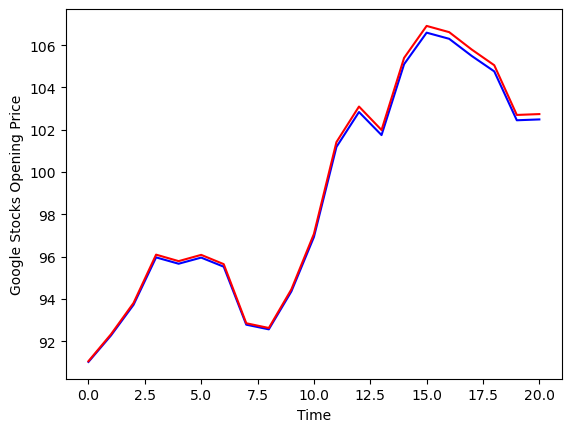

In [223]:
plt.plot(test_set,color = 'blue',label = "Real Observed Price")
plt.plot(predicted_price, color = 'red', label ='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Google Stocks Opening Price')
plt.show

In [252]:
pred = pd.to_numeric((pd.Series(np.ravel(predicted_price))))
test_df = test_df.reset_index()

In [254]:
test_df['Predictions'] = pred
test_df['Error'] = test_df['Predictions'] - test_df['Open'] 
test_df

,Date,Open,High,Low,Close,Volume,Predictions,Error
0,2023-03-01 00:00:00-05:00,89.980003,91.029999,89.669998,90.360001,31111200,91.064476,1.084473
1,2023-03-02 00:00:00-05:00,89.660004,92.279999,89.589996,92.000000,32204400,92.337837,2.677834
2,2023-03-03 00:00:00-05:00,92.480003,93.730003,92.449997,93.650002,35133300,93.815598,1.335594
3,2023-03-06 00:00:00-05:00,94.019997,95.970001,94.000000,95.129997,32639300,96.099220,2.079224
4,2023-03-07 00:00:00-05:00,94.980003,95.669998,93.529999,93.860001,27835500,95.793343,0.813339
5,2023-03-08 00:00:00-05:00,94.120003,95.959999,94.000000,94.250000,34103300,96.089027,1.969025
6,2023-03-09 00:00:00-05:00,94.050003,95.529999,91.900002,92.320000,28813500,95.650604,1.600601
7,2023-03-10 00:00:00-05:00,92.169998,92.790001,90.400002,90.629997,35927000,92.857521,0.687523
8,2023-03-13 00:00:00-04:00,90.089996,92.570000,89.419998,91.110001,37335600,92.633347,2.543350
9,2023-03-14 00:00:00-04:00,92.559998,94.360001,92.440002,93.970001,36050200,94.457787,1.897789


In [257]:
pd.options.plotting.backend = 'plotly'
test_df.plot(x = "Date",y = ['Open','Predictions'])